In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob
import geopandas as gp
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.facecolor']='w'
plt.rcParams['font.family'] = "serif"
import warnings
warnings.filterwarnings('ignore')

In [2]:
chicago_shp = '../data_misc/chicago_shapefile/geo_export_2702d908-a4db-4dc5-a4de-78a5f3f67445.shp'
chicago_shp = '../data_misc/chicago_shapefile/geo_export_ec346dbb-8c11-44b4-be04-0301ae3f9c64.shp'
chicago = gp.read_file(chicago_shp)
chicago.geoid10 = chicago.geoid10.apply(np.int64)
chicago

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856..."
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874..."
...,...,...,...,...,...,...,...,...,...,...
796,7,7.0,031,17031070400,704,Census Tract 704,None,17,070400,"POLYGON ((-87.65746 41.93258, -87.65722 41.932..."
797,7,7.0,031,17031070500,705,Census Tract 705,None,17,070500,"POLYGON ((-87.66349 41.93036, -87.66350 41.930..."
798,13,13.0,031,17031130300,1303,Census Tract 1303,None,17,130300,"POLYGON ((-87.71436 41.98300, -87.71472 41.982..."
799,29,29.0,031,17031292200,2922,Census Tract 2922,None,17,292200,"POLYGON ((-87.71317 41.85523, -87.71357 41.855..."


In [3]:
chicago[['geoid10','name10']][12:24]


,geoid10,name10
12,17031540102,5401.02
13,17031843300,8433
14,17031540101,5401.01
15,17031440201,4402.01
16,17031080202,802.02
17,17031070102,701.02
18,17031031501,315.01
19,17031031502,315.02
20,17031834900,8349
21,17031834800,8348


In [4]:
pop_df = pd.read_csv('Population_by_2010_Census_Block.csv')
pop_df.head()

,CENSUS BLOCK,CENSUS BLOCK FULL,TOTAL POPULATION
0,310003002,170310310003002,104
1,310003003,170310310003003,46
2,310003004,170310310003004,40
3,310003005,170310310003005,58
4,310003006,170310310003006,75


In [5]:
get_census_tract = lambda n: int(str(n)[:-4])

In [6]:
get_census_tract(pop_df['CENSUS BLOCK FULL'].values[0])

17031031000

In [7]:
pop_df['geoid10'] = pop_df['CENSUS BLOCK FULL'].apply(get_census_tract)
pop_df.head()

,CENSUS BLOCK,CENSUS BLOCK FULL,TOTAL POPULATION,geoid10
0,310003002,170310310003002,104,17031031000
1,310003003,170310310003003,46,17031031000
2,310003004,170310310003004,40,17031031000
3,310003005,170310310003005,58,17031031000
4,310003006,170310310003006,75,17031031000


In [8]:
pop_agg = pop_df[['TOTAL POPULATION','geoid10']].groupby('geoid10').sum()

In [9]:
pop_agg

,TOTAL POPULATION
geoid10,
17031010100,4854
17031010201,6450
17031010202,2818
17031010300,6236
17031010400,5042
...,...
17031843700,2117
17031843800,2110
17031843900,3533


In [10]:
chicago_pop = chicago.merge(pop_agg, on='geoid10',how='left')
chicago_pop

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry,TOTAL POPULATION
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730...",3304
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823...",3950
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852...",7254
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856...",5262
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874...",7311
...,...,...,...,...,...,...,...,...,...,...,...
796,7,7.0,031,17031070400,704,Census Tract 704,None,17,070400,"POLYGON ((-87.65746 41.93258, -87.65722 41.932...",2984
797,7,7.0,031,17031070500,705,Census Tract 705,None,17,070500,"POLYGON ((-87.66349 41.93036, -87.66350 41.930...",2928
798,13,13.0,031,17031130300,1303,Census Tract 1303,None,17,130300,"POLYGON ((-87.71436 41.98300, -87.71472 41.982...",5064
799,29,29.0,031,17031292200,2922,Census Tract 2922,None,17,292200,"POLYGON ((-87.71317 41.85523, -87.71357 41.855...",2961


In [11]:
chi_copy = chicago_pop.copy()
chi_copy = chi_copy.to_crs(epsg=6933)
print(chi_copy.crs)
chi_copy['area'] = chi_copy.geometry.area/1e6
chi_copy.head(2)

epsg:6933


,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry,TOTAL POPULATION,area
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-8454518.452 4874965.659, -8454518.4...",3304,1.968638
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-8460503.689 4883841.287, -8460502.3...",3950,0.831225


In [12]:
chicago_pop['tract_area'] = chi_copy['area']
chicago_pop.head(5)

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry,TOTAL POPULATION,tract_area
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730...",3304,1.968638
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823...",3950,0.831225
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852...",7254,1.143245
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856...",5262,0.625406
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874...",7311,0.516456


<AxesSubplot:>

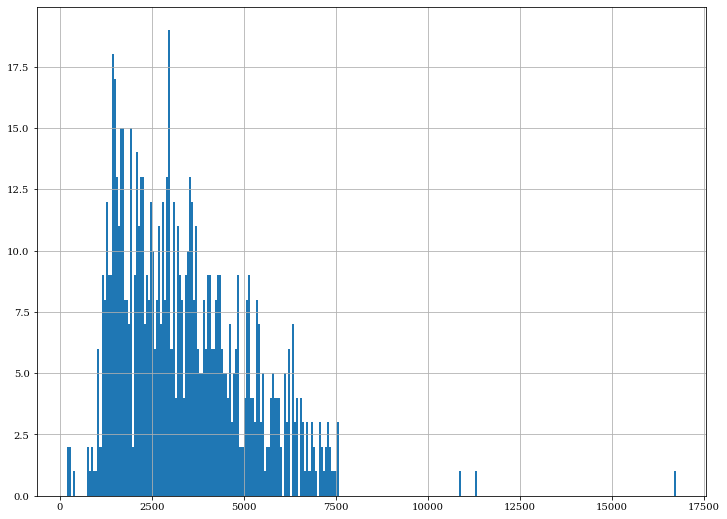

In [13]:
chicago_pop[chicago_pop['TOTAL POPULATION']>100]['TOTAL POPULATION'].hist(bins=300)

<AxesSubplot:>

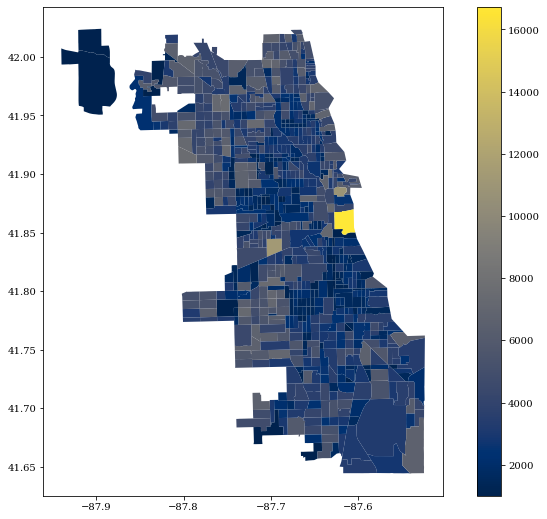

In [14]:
chicago_pop.plot(column='TOTAL POPULATION', cmap='cividis', legend=True, vmin=1000)

In [15]:
chicago_pop['pop_dens'] = np.divide(chicago_pop['TOTAL POPULATION'], chicago_pop['tract_area'])
chicago_pop.head()

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry,TOTAL POPULATION,tract_area,pop_dens
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730...",3304,1.968638,1678.317401
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823...",3950,0.831225,4752.022615
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852...",7254,1.143245,6345.095635
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856...",5262,0.625406,8413.737852
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874...",7311,0.516456,14156.090278


In [16]:
chicago_pop['pop_dens'].max()

196419.26399456998

<AxesSubplot:>

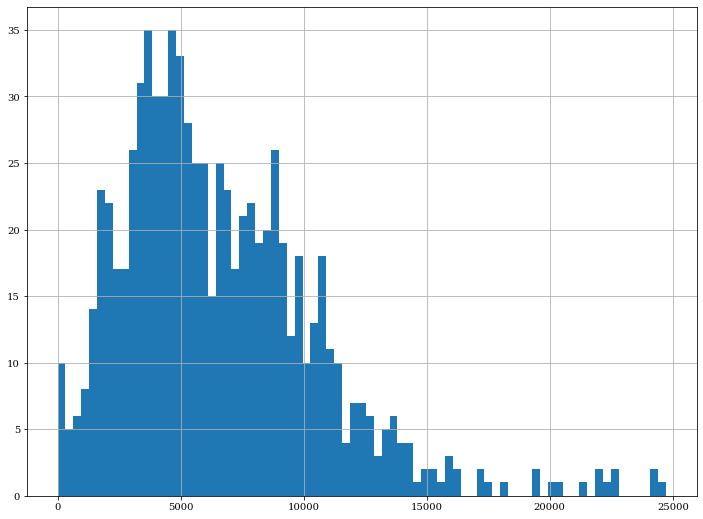

In [17]:
chicago_pop[chicago_pop['pop_dens']<25e3].pop_dens.hist(bins=77)

Text(0.5, 1.0, 'Chicago Population Density by Census Tract \n Population per Sq. km')

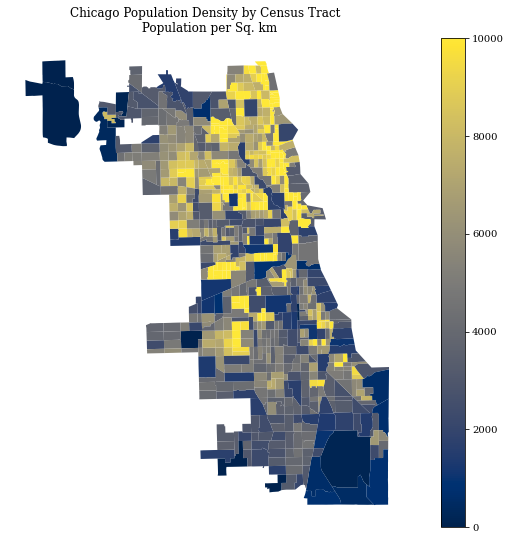

In [18]:
# ax = chicago_pop.plot(column='pop_dens', cmap='cividis', vmin=0, vmax=1.7e4, legend=True)
ax = chicago_pop.plot(column='pop_dens', cmap='cividis', vmax=10e3, legend=True)
ax.set_axis_off()
ax.set_title('Chicago Population Density by Census Tract \n Population per Sq. km')

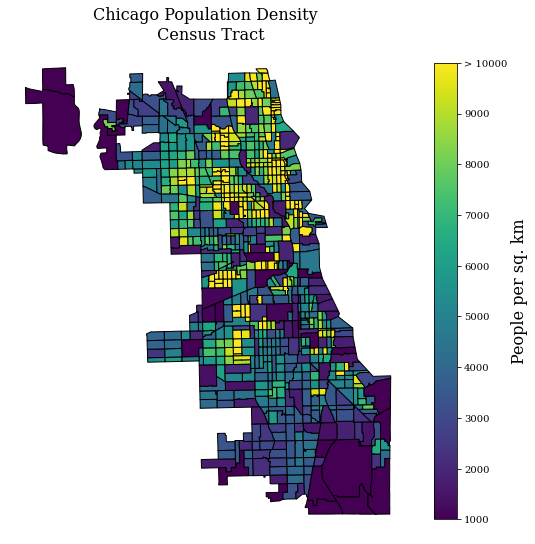

In [29]:
import matplotlib.colors as colors
fig, ax = plt.subplots(figsize=(9,12))
norm = colors.Normalize(vmin=1e3, vmax=10e3)
cmap = 'viridis'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
chicago_pop.plot(ax=ax, edgecolor='k',column='pop_dens', norm=norm, cmap=cmap, legend=False)
ax_cbar = fig.colorbar(cbar, ax=ax, shrink=0.7)
ax_cbar.set_label(r'People per sq. km', fontsize=16)
ax_cbar.ax.set_yticklabels(['1000','2000','3000','4000','5000','6000','7000','8000','9000','> 10000'])
# counties.centroid.plot(ax=ax, color='tab:red')
ax.set_title('Chicago Population Density \n Census Tract', fontsize=16)
ax.set_axis_off()
plt.savefig('../chicago-solar/paper/figures/population_density.eps', format='eps')